In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
from runner import Runner

In [4]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmpcnhvo8t7GP2


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
weights = {
    'A': 0.5,
    'A_train': 0.01,
    'A_val': 0.39,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 20

In [7]:
#
#
R.setup_data(images, masks, dataset_size=10000, weights=weights)

Weights OK!


In [8]:
RUNS = 5

In [9]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmpcnhvo8t7GP2/unet_0.model
History saved to /tmp/tmpcnhvo8t7GP2/history_0.pickle
Testing the classifier...
94/94 [==============================] - 10s 105ms/step - loss: 1.5469 - dice_coeff: 0.2334
Model saved to /tmp/tmpcnhvo8t7GP2/cnnd_0.model
History saved to /tmp/tmpcnhvo8t7GP2/cnnd_history_0.pickle
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Found 301 machine labels.
Replacing 60 from 301 !
Removed: 54 Filled: 54
TOOK 884.9574465751648 seconds
***
RUN: 1
Model saved to /tmp/tmpcnhvo8t7GP2/unet_1.model
History saved to /tmp/tmpcnhvo8t7GP2/history_1.pickle
Testing the classifier...
94/94 [==============================] - 10s 103ms/step - loss: 1.5207 - dice_coeff: 0.2470
Testing the discriminator...
19/19 [==============================] - 0s 22ms/step - loss: 0.2224 - accuracy: 0.9967
Found 293 machine labels.
Replacing 58 from 293 !
Removed: 50 Filled: 50
TOOK 245.5391755

In [10]:
R.classifier_scores

[[1.5469194650650024, 0.2334064096212387],
 [1.5206674337387085, 0.24697807431221008],
 [1.44798743724823, 0.2624608874320984],
 [1.3625202178955078, 0.28607141971588135],
 [1.1330915689468384, 0.332538902759552]]

In [11]:
R.discriminator_scores

[[0.0, 1.0],
 [0.22239743173122406, 0.996666669845581],
 [6.019563674926758, 0.9333333373069763],
 [19.635507583618164, 0.8500000238418579],
 [178.15670776367188, 0.550000011920929]]

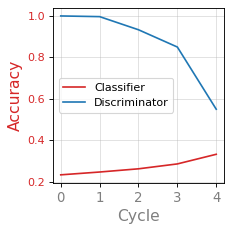

In [12]:
R.plot()